<a href="https://colab.research.google.com/github/bilalProgTech/btech-nmims/blob/master/NN-DL/Lab-Work/20230730-Lab-2-BTech-NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -f hmnist_28_28_RGB.csv

 99% 26.0M/26.2M [00:02<00:00, 20.5MB/s]
100% 26.2M/26.2M [00:02<00:00, 11.7MB/s]


In [ ]:
!unzip *.zip

Archive:  hmnist_28_28_RGB.csv.zip
  inflating: hmnist_28_28_RGB.csv    


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Computer Vision using DNN

    'Actinic keratoses':0,
    'Basal cell carcinoma':1,
    'Benign keratosis-like lesions':2,
    'Dermatofibroma':3,
    'Melanocytic nevi':4,
    'Vascular lesions':5,
    'Melanoma':6,

In [ ]:
data = pd.read_csv('/content/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
label={
    0: 'Actinic keratoses',
    1: 'Basal cell carcinoma',
    2: 'Benign keratosis-like lesions',
    3: 'Dermatofibroma',
    4: 'Melanocytic nevi',
    5: 'Vascular lesions',
    6: 'Melanoma',
}

In [ ]:
data.shape

(10015, 2353)

In [ ]:
data['label'].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
X = data.drop(['label'], axis=1)
y = data['label']
training_images, testing_images, training_labels, testing_labels = train_test_split(X, y, test_size=0.20, shuffle=True)

In [ ]:
training_images.shape

(8012, 2352)

In [ ]:
training_labels.shape

(8012,)

In [ ]:
training_images = training_images / 255
testing_images = testing_images / 255

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(X.shape[1])),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 128)               301184    
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 302,087
Trainable params: 302,087
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
251/251 [==============================] - 6s 4ms/step - loss: 1.0843 - accuracy: 0.6553
Epoch 2/10
251/251 [==============================] - 1s 4ms/step - loss: 0.9887 - accuracy: 0.6645
Epoch 3/10
251/251 [==============================] - 1s 4ms/step - loss: 0.9669 - accuracy: 0.6699
Epoch 4/10
251/251 [==============================] - 1s 3ms/step - loss: 0.9374 - accuracy: 0.6696
Epoch 5/10
251/251 [==============================] - 1s 3ms/step - loss: 0.9334 - accuracy: 0.6721
Epoch 6/10
251/251 [==============================] - 1s 3ms/step - loss: 0.9165 - accuracy: 0.6740
Epoch 7/10
251/251 [==============================] - 1s 3ms/step - loss: 0.9105 - accuracy: 0.6767
Epoch 8/10
251/251 [==============================] - 1s 3ms/step - loss: 0.9028 - accuracy: 0.6766
Epoch 9/10
251/251 [==============================] - 1s 3ms/step - loss: 0.9043 - accuracy: 0.6796
Epoch 10/10
251/251 [==============================] - 1s 3ms/step - loss: 0.9116 - accuracy: 0.6737

In [ ]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [ ]:
print(accuracy_score(testing_labels, pred))

0.6684972541188218


In [ ]:
print(log_loss(testing_labels, prob))

0.9125299895228411


In [ ]:
model.evaluate(testing_images, testing_labels)

63/63 [==============================] - 0s 3ms/step - loss: 0.9125 - accuracy: 0.6685


[0.9125300645828247, 0.6684972643852234]

In [ ]:
import seaborn as sns

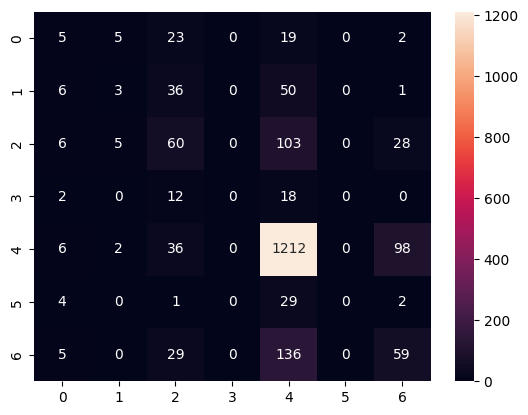

In [ ]:
sns.heatmap(confusion_matrix(testing_labels, pred), annot=True, fmt='g')
plt.show()

# Convolution and Pooling

In [ ]:
import cv2

In [ ]:
sample_matrix = np.array([[1, 1, 1, 0, 0, 1],
                          [1, 1, 0, 0, 0, 1],
                          [1, 1, 1, 0, 0, 1],
                          [1, 1, 0, 0, 0, 1],
                          [1, 1, 1, 0, 0, 1],
                          [1, 1, 0, 0, 0, 1]])
size_x = sample_matrix.shape[0]
size_y = sample_matrix.shape[1]

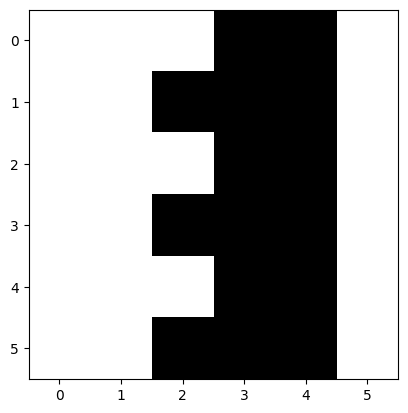

In [ ]:
plt.gray()
plt.imshow(sample_matrix)

In [ ]:
filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]] # To detect edge
weight = 0.2
#filter = [ [0, -1, 0], [-1, -5, 1], [0, -1, 0]] # To sharpen the image
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]] # To detect strong edges
filter

[[0, 1, 0], [1, -4, 1], [0, 1, 0]]

In [ ]:
filter

[[0, 1, 0], [1, -4, 1], [0, 1, 0]]

In [ ]:
mat_transformed = np.copy(sample_matrix)

In [ ]:
# Convolution Code

for x in range(1, size_x-1):
    for y in range(1, size_y-1):
      conv = 0
      conv = conv + (sample_matrix[x-1, y-1] * filter[0][0])
      conv = conv + (sample_matrix[x-1, y] * filter[1][0])
      conv = conv + (sample_matrix[x-1, y+1] * filter[2][0])

      conv = conv + (sample_matrix[x, y-1] * filter[0][1])
      conv = conv + (sample_matrix[x, y] * filter[1][1])
      conv = conv + (sample_matrix[x, y+1] * filter[2][1])

      conv = conv + (sample_matrix[x+1, y-1] * filter[0][2])
      conv = conv + (sample_matrix[x+1, y] * filter[1][2])
      conv = conv + (sample_matrix[x+1, y+1] * filter[2][2])

      conv = conv * weight

      if conv < 0:
          conv = 0
      if conv > 255:
          conv = 255

      mat_transformed[x, y] = conv

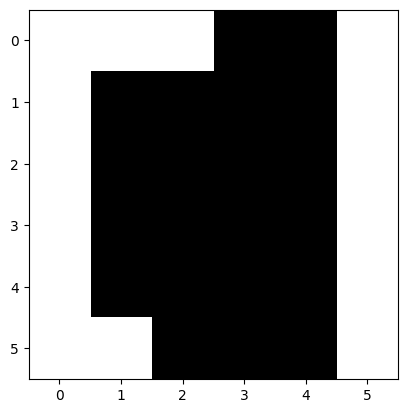

In [ ]:
plt.gray()
plt.imshow(mat_transformed)

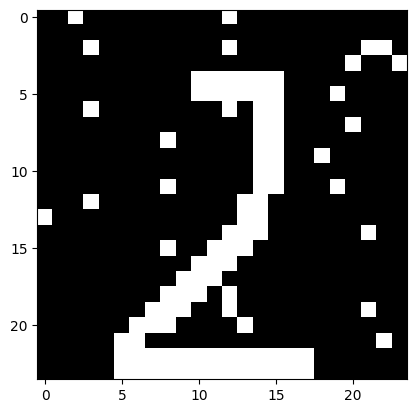

In [ ]:
matrix = [[0 for _ in range(24)] for _ in range(24)]

handwritten_two = [
    "000000000000000000000000",
    "000000000000000000000000",
    "000000000000000000000000",
    "000000000000000000000000",
    "000000000011111100000000",
    "000000000011111100000000",
    "000000000000001100000000",
    "000000000000001100000000",
    "000000000000001100000000",
    "000000000000001100000000",
    "000000000000001100000000",
    "000000000000001100000000",
    "000000000000011000000000",
    "000000000000011000000000",
    "000000000000111000000000",
    "000000000001110000000000",
    "000000000011100000000000",
    "000000000111000000000000",
    "000000001110000000000000",
    "000000011100000000000000",
    "000000111000000000000000",
    "000001100000000000000000",
    "000001111111111111000000",
    "000001111111111111000000",
    "000000000000000000000000",
]

for i in range(24):
    for j in range(24):
        matrix[i][j] = int(handwritten_two[i][j])

num_errors = 30
for _ in range(num_errors):
    row_idx = random.randint(0, 23)
    col_idx = random.randint(0, 23)
    matrix[row_idx][col_idx] = 1
matrix = np.array(matrix)
size_x = matrix.shape[0]
size_y = matrix.shape[1]
plt.gray()
plt.imshow(matrix)

In [ ]:
#filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]] # To detect edge
weight = 0.9
#filter = [ [0, -1, 0], [-1, -5, 1], [0, -1, 0]] # To sharpen the image
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]] # To detect strong edges
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] # To detect strong edges

filter

[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

In [ ]:
mat_transformed = np.copy(matrix)

In [ ]:
# Convolution Code

for x in range(1, size_x-1):
    for y in range(1, size_y-1):
      conv = 0
      conv = conv + (matrix[x-1, y-1] * filter[0][0])
      conv = conv + (matrix[x-1, y] * filter[1][0])
      conv = conv + (matrix[x-1, y+1] * filter[2][0])

      conv = conv + (matrix[x, y-1] * filter[0][1])
      conv = conv + (matrix[x, y] * filter[1][1])
      conv = conv + (matrix[x, y+1] * filter[2][1])

      conv = conv + (matrix[x+1, y-1] * filter[0][2])
      conv = conv + (matrix[x+1, y] * filter[1][2])
      conv = conv + (matrix[x+1, y+1] * filter[2][2])

      conv = conv * weight

      if conv < 0:
          conv = 0
      if conv > 255:
          conv = 255

      mat_transformed[x, y] = conv

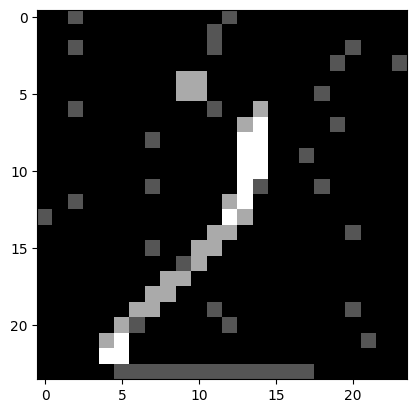

In [ ]:
plt.gray()
plt.imshow(mat_transformed)

In [ ]:
size_x/2, size_y/2, size_x, size_y

(12.0, 12.0, 24, 24)

In [ ]:
# Pooling Code
new_x = int(size_x/2)
new_y = int(size_y/2)
pooling_image = np.zeros((new_x, new_y))
pooling_image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(mat_transformed[x, y])
        pixels.append(mat_transformed[x, y+1])
        pixels.append(mat_transformed[x+1, y])
        pixels.append(mat_transformed[x+1, y+1])
        pixels.sort(reverse=True)

        pooling_image[int(x/2), int(y/2)] = pixels[0]

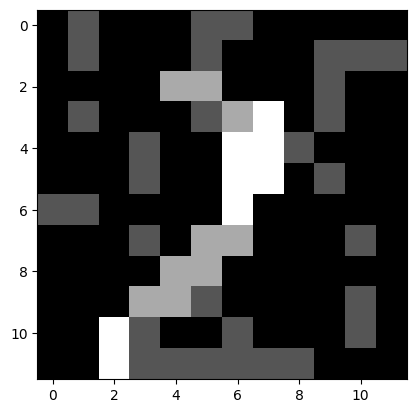

In [ ]:
plt.gray()
plt.imshow(pooling_image)
plt.show()

In [ ]:
img = cv2.imread('/content/input.jpg', 0)
img.shape

(250, 250)

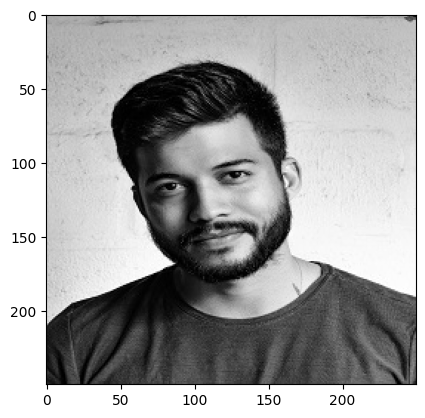

In [ ]:
plt.gray()
plt.imshow(img)

In [ ]:
img.shape

(250, 250)

In [ ]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

In [ ]:
#filter = [[0, 1, 0], [1, -4, 1], [0, 1, 0]] # To detect edge
weight = 1
#filter = [ [0, -1, 0], [-1, -5, 1], [0, -1, 0]] # To sharpen the image
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]] # To detect strong edges
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] # To detect strong edges

filter

[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]

In [ ]:
# Convolution Code

for x in range(1, size_x-1):
    for y in range(1, size_y-1):
      conv = 0
      try:
          conv = conv + (img[x-1, y-1] * filter[0][0])
          conv = conv + (img[x-1, y] * filter[1][0])
          conv = conv + (img[x-1, y+1] * filter[2][0])

          conv = conv + (img[x, y-1] * filter[0][1])
          conv = conv + (img[x, y] * filter[1][1])
          conv = conv + (img[x, y+1] * filter[2][1])

          conv = conv + (img[x+1, y-1] * filter[0][2])
          conv = conv + (img[x+1, y] * filter[1][2])
          conv = conv + (img[x+1, y+1] * filter[2][2])
      except:
          continue

      conv = conv * weight

      if conv < 0:
          conv = 0
      if conv > 255:
          conv = 255

      img_transformed[x, y] = conv

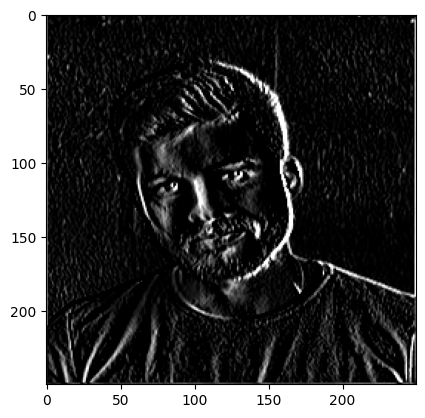

In [ ]:
plt.gray()
plt.imshow(img_transformed)
plt.show()

In [ ]:
# Pooling Code
new_x = int(size_x/2)
new_y = int(size_y/2)
pooling_image = np.zeros((new_x, new_y))
pooling_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        try:
            pixels.append(img_transformed[x, y])
            pixels.append(img_transformed[x, y+1])
            pixels.append(img_transformed[x+1, y])
            pixels.append(img_transformed[x+1, y+1])
            pixels.sort(reverse=True)
        except:
            continue

        pooling_image[int(x/2), int(y/2)] = pixels[0]

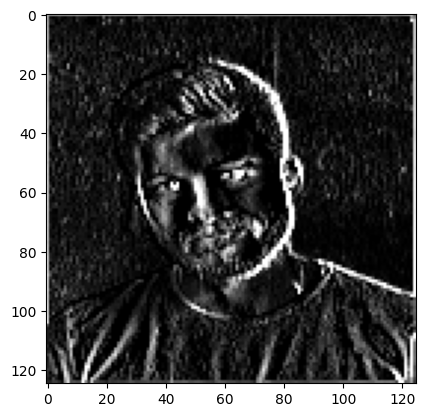

In [ ]:
plt.gray()
plt.imshow(pooling_image)
plt.show()

# CNN Model in Skin Cancer MNIST

In [ ]:
training_images.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
9682,0.039216,0.023529,0.019608,0.109804,0.090196,0.113725,0.427451,0.396078,0.400000,0.678431,...,0.788235,0.843137,0.811765,0.815686,0.682353,0.658824,0.650980,0.400000,0.372549,0.349020
8111,0.831373,0.662745,0.654902,0.827451,0.647059,0.615686,0.831373,0.650980,0.619608,0.835294,...,0.647059,0.878431,0.698039,0.674510,0.870588,0.690196,0.666667,0.862745,0.686275,0.666667
2675,0.780392,0.623529,0.654902,0.796078,0.643137,0.674510,0.800000,0.643137,0.666667,0.815686,...,0.674510,0.807843,0.643137,0.650980,0.796078,0.627451,0.639216,0.776471,0.603922,0.607843
2183,0.815686,0.670588,0.698039,0.819608,0.682353,0.713725,0.823529,0.670588,0.705882,0.827451,...,0.749020,0.839216,0.705882,0.721569,0.839216,0.705882,0.705882,0.831373,0.698039,0.698039
3431,0.835294,0.490196,0.470588,0.792157,0.454902,0.423529,0.733333,0.407843,0.392157,0.760784,...,0.309804,0.698039,0.392157,0.376471,0.741176,0.419608,0.411765,0.737255,0.427451,0.415686


In [ ]:
training_images = np.array(training_images).reshape(-1, 28, 28, 3)
testing_images = np.array(testing_images).reshape(-1, 28, 28, 3)
training_images.shape, testing_images.shape

((8012, 28, 28, 3), (2003, 28, 28, 3))

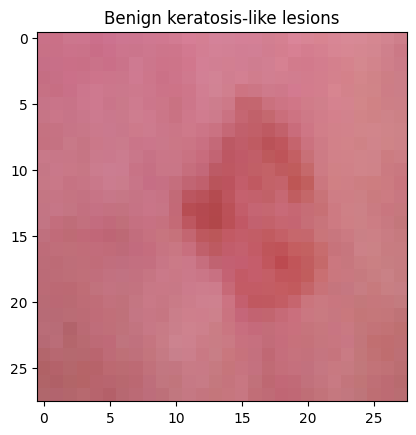

In [ ]:
plt.imshow(training_images[70])
plt.title(label[training_labels[70]])
plt.show()

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape=(28, 28, 3)),
                             tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2, 2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
251/251 [==============================] - 8s 5ms/step - loss: 1.0325 - accuracy: 0.6656
Epoch 2/10
251/251 [==============================] - 1s 4ms/step - loss: 0.9407 - accuracy: 0.6707
Epoch 3/10
251/251 [==============================] - 1s 4ms/step - loss: 0.8982 - accuracy: 0.6796
Epoch 4/10
251/251 [==============================] - 1s 4ms/step - loss: 0.8618 - accuracy: 0.6891
Epoch 5/10
251/251 [==============================] - 1s 5ms/step - loss: 0.8410 - accuracy: 0.6930
Epoch 6/10
251/251 [==============================] - 2s 6ms/step - loss: 0.8039 - accuracy: 0.7002
Epoch 7/10
251/251 [==============================] - 1s 5ms/step - loss: 0.7795 - accuracy: 0.7126
Epoch 8/10
251/251 [==============================] - 1s 4ms/step - loss: 0.7541 - accuracy: 0.7187
Epoch 9/10
251/251 [==============================] - 1s 4ms/step - loss: 0.7222 - accuracy: 0.7280
Epoch 10/10
251/251 [==============================] - 1s 4ms/step - loss: 0.7123 - accuracy: 0.7351

In [ ]:
model.evaluate(testing_images, testing_labels)

63/63 [==============================] - 0s 4ms/step - loss: 0.7172 - accuracy: 0.7354


[0.7172423601150513, 0.7353969216346741]

63/63 [==============================] - 0s 3ms/step
0.7353969046430354
0.7172424057206155


<Axes: >

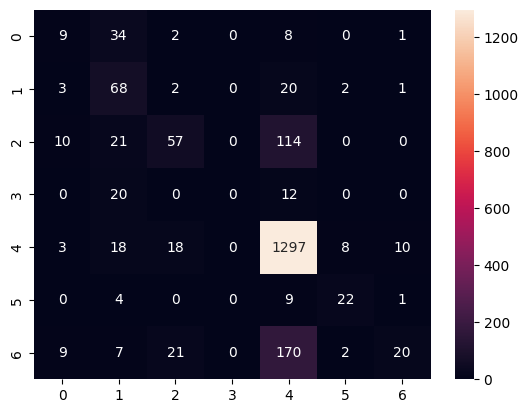

In [ ]:
y_prob = model.predict(testing_images)
y_pred = np.argmax(y_prob, axis=1)
print(accuracy_score(testing_labels, y_pred))
print(log_loss(testing_labels, y_prob))
sns.heatmap(confusion_matrix(testing_labels, y_pred), annot=True, fmt='g')